### Import the Necessary Modules

In [1]:
import sys
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# locate the repo root (directory that contains "scripts") and add it to sys.path
cwd = Path.cwd()
repo_root = None
for p in [cwd] + list(cwd.parents):
    if (p / "scripts").is_dir():
        repo_root = p
        break

if repo_root is None:
    raise RuntimeError(f"Project root containing 'scripts' not found. Current working directory: {cwd}")

repo_root_str = str(repo_root.resolve())
if repo_root_str not in sys.path:
    sys.path.insert(0, repo_root_str)

print("Project root added to sys.path:", repo_root_str)

# Import local modules
from scripts.preprocess import main as run_preprocessor
from scripts.scrape import main as run_scraper

Project root added to sys.path: C:\Users\jakin\Desktop\KIAM program\customer-experience-analytics


### Run Scraping Pipeline

In [2]:
# Run the main scraper function
raw_df = run_scraper()

# Check if the dataset is not empty
if not raw_df.empty:
    print("\n✅ Scraping Finished.")
    display(raw_df.head())
else:
    print("\n❌ Scraping Failed.")

STARTING GOOGLE PLAY STORE SCRAPER

[1/2] Fetching app info...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
    Current Rating: 4.3195715
    Total Ratings: 38866
    Total Reviews: 8337

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
    Current Rating: 4.171384
    Total Ratings: 6365
    Total Reviews: 1219

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
    Current Rating: 4.168704
    Total Ratings: 3915
    Total Reviews: 771

App information saved to ../data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:  33%|███▎      | 1/3 [00:04<00:08,  4.38s/it]

Successfully scraped 500 reviews
Collected 500 reviews for Commercial Bank of Ethiopia


Banks:  67%|██████▋   | 2/3 [00:08<00:03,  3.97s/it]

Successfully scraped 500 reviews
Collected 500 reviews for Bank of Abyssinia


Banks: 100%|██████████| 3/3 [00:13<00:00,  4.54s/it]

Successfully scraped 500 reviews
Collected 500 reviews for Dashen Bank


SCRAPING COMPLETE
Total reviews collected: 1500
Reviews per bank:
  Commercial Bank of Ethiopia: 500
  Bank of Abyssinia: 500
  Dashen Bank: 500

Data saved to: ../data/raw/reviews_raw.csv

SAMPLE REVIEWS

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: CBE ይለያል።...
Date: 2025-11-29 17:22:32

Rating: ⭐⭐⭐⭐⭐
Review: it's special for me...
Date: 2025-11-29 15:54:14

Rating: ⭐⭐
Review: Make it user friendly....
Date: 2025-11-29 08:17:45

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: 🙏👍...
Date: 2025-11-29 03:47:54

Rating: ⭐⭐⭐⭐⭐
Review: Very Good...
Date: 2025-11-28 20:18:20

Rating: ⭐⭐⭐⭐⭐
Review: goof...
Date: 2025-11-28 13:33:37

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: very smart App easy to use and friendly...
Date: 2025-11-29 16:22:04

Rating: ⭐⭐⭐⭐⭐
Review: Very exemplery App to other Bank Aps !...
Date: 2025-

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,cb37b096-e071-4f0f-a8fd-067b7d71706d,CBE ይለያል።,5,2025-11-29 17:22:32,Kamil Tesfaye,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
1,70f504ff-daed-40d9-9c89-cc49a95ef659,it's special for me,5,2025-11-29 15:54:14,Abde Semed,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
2,28f229b5-0026-41b9-a1eb-b76e74736f63,Make it user friendly.,2,2025-11-29 08:17:45,TOMIZ Creativity,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
3,68d8daea-db47-4e23-a692-755173dea983,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,Tesfaye Abdi,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,ee0dbb0e-4eb0-47b5-9874-c37877493f99,good app,5,2025-11-28 11:33:17,Betelhem Kebede,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play


### Run Preprocessing Pipline

In [10]:
# Run the main preprocessing function
processed_df = run_preprocessor()
display(processed_df.head())
print(f"Saved {len(processed_df)} processed review data.")

STARTING PREPROCESSING
Loading raw data...
Loaded 1500 raw reviews

[1/7] Checking missing values...

Missing values:
 reply_content: 1498 (99.87%)
 app_id: 336 (22.40%)

[2/7] Removing duplicate...
Removed 290 duplicate reviews

[3/7] Handling missing critical data...

[4/7] Normalizing dates...
Date range: 2024-08-04 to 2025-11-29

[5/7] Cleaning review text...
Removed 60 empty/non-English reviews

[6/7] Validating rating values...
All ratings are valid (1-5)

[7/7] Finalizing dataset...
Final dataset: 1150 reviews

Saving processed data...

Saved processed file to: ../data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1500
Records with missing critical data: 0
Duplicate reviews removed: 290
Empty reviews removed: 60
Invalid ratings removed: 0
Final records: 1150

Data retention rate: 76.67%
Data error rate: 23.33%
⚠ Data quality: NEEDS ATTENTION (>10% errors)

Reviews per bank:
  Dashen Bank: 385
  Commercial Bank of Ethiopia: 384
  Bank of Abyssinia: 381


,review_id,review_text,rating,review_date,review_year,review_month,bank_code,bank_name,user_name,thumbs_up,text_length,source
0,a6cbfa34-f2b1-4a16-96b6-c94f58cea76f,Very Good,5,2025-11-28,2025,11,BOA,Bank of Abyssinia,Wariyo Dida,0,9,Google Play
1,fc67d12c-92e2-45aa-a9e0-011f58a583bc,goof,5,2025-11-28,2025,11,BOA,Bank of Abyssinia,Hailegebrail Tegegn,0,4,Google Play
2,11306fb9-5571-4950-8d32-604c5402242f,good!,5,2025-11-28,2025,11,BOA,Bank of Abyssinia,Tsegay ab,0,5,Google Play
3,809c46d2-730e-446a-9061-2a45e978ad9d,good jop,5,2025-11-27,2025,11,BOA,Bank of Abyssinia,Yohanis Fikadu,0,8,Google Play
4,f28a3a3c-eb94-4aab-88d2-89bcecebcc7b,bad exprience...it is so crushed,1,2025-11-27,2025,11,BOA,Bank of Abyssinia,ሻንበል ኪዳነ,0,32,Google Play


Saved 1150 processed review data.


### Visualizations

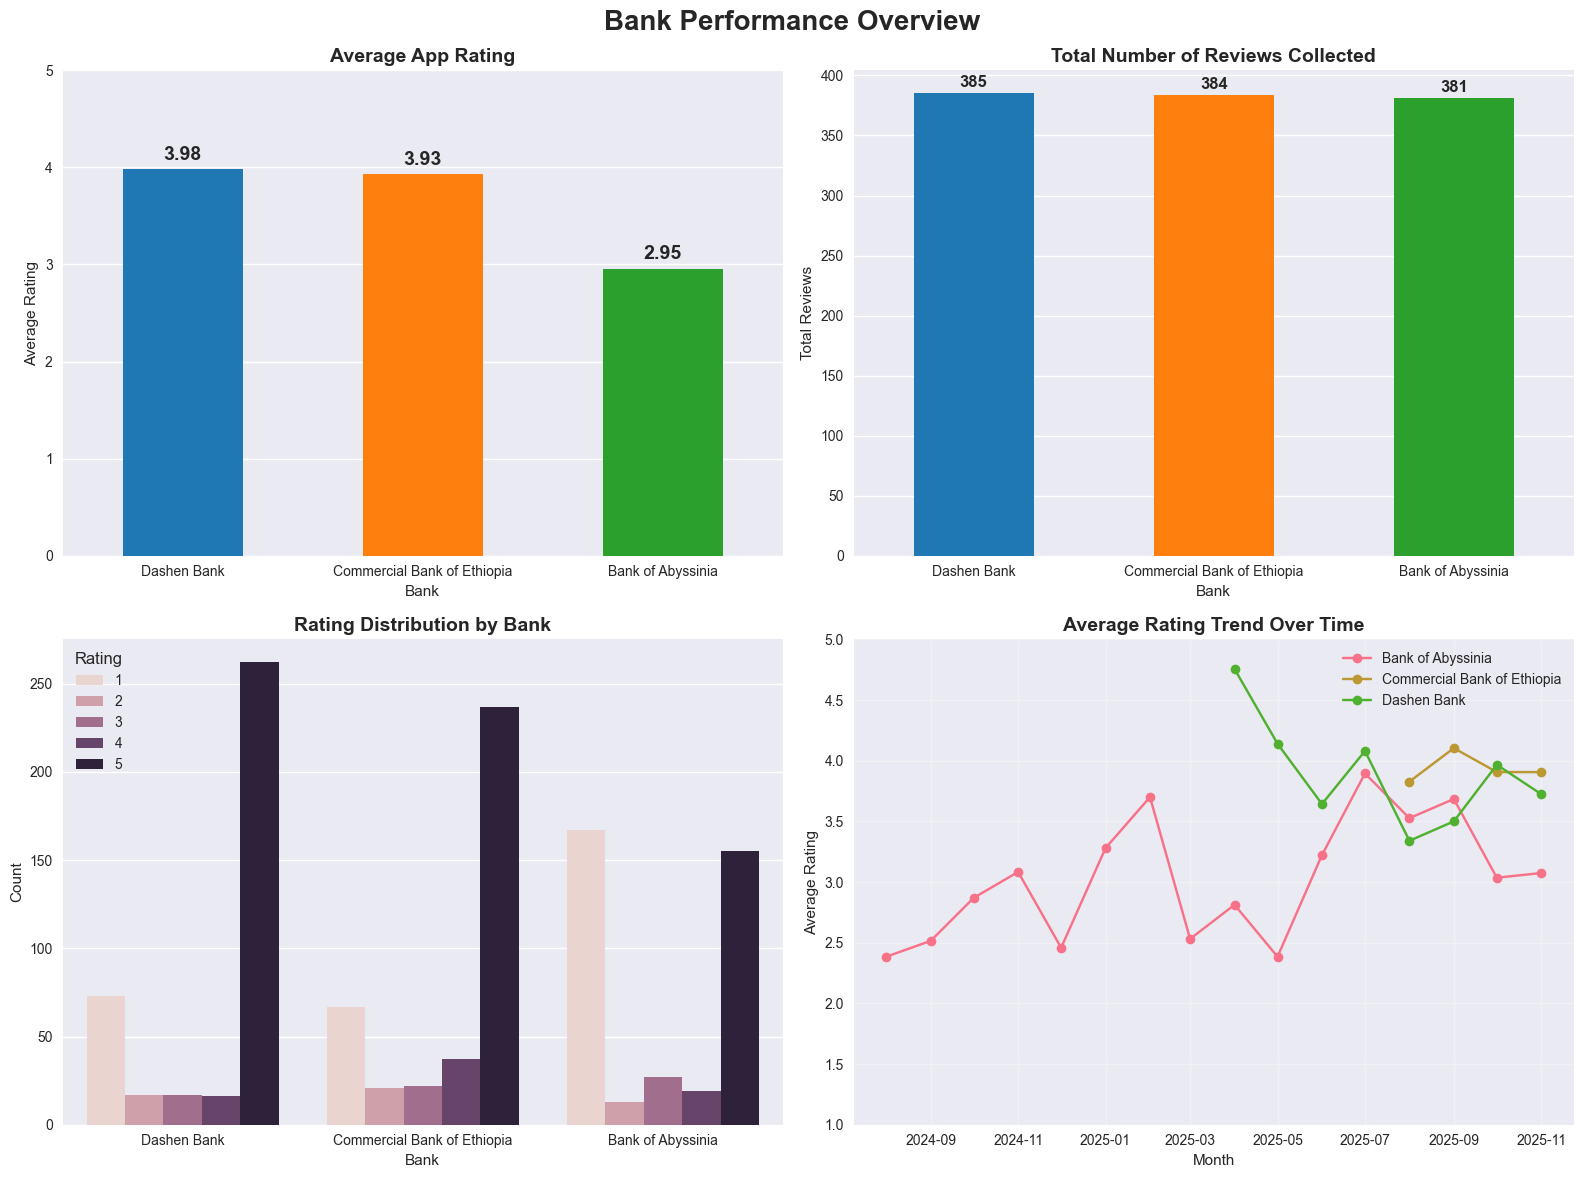

In [53]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# ──────────────────────────────
# 1. OVERALL BANK COMPARISON
# ──────────────────────────────

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bank Performance Overview', fontsize=20, fontweight='bold', y=0.98)

# 1. Average Rating
rating_order = processed_df.groupby('bank_name')['rating'].mean().sort_values(ascending=False).index
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
sns.barplot(data=processed_df, x='bank_name', y='rating', order=rating_order, ax=axes[0,0], errorbar=None, dodge=False, width=0.5)
for i, patch in enumerate(axes[0,0].patches):
    patch.set_facecolor(colors[i % len(colors)])
axes[0,0].set_title('Average App Rating', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Bank')
axes[0,0].set_ylabel('Average Rating')
axes[0,0].set_ylim(0, 5)
for i, v in enumerate(processed_df.groupby('bank_name')['rating'].mean().sort_values(ascending=False)):
    axes[0,0].text(i, v + 0.1, f"{v:.2f}", ha='center', fontweight='bold', fontsize=14)

# 2. Total Reviews
sns.countplot(data=processed_df, x='bank_name', order=rating_order, ax=axes[0,1], width=0.5)
for i, patch in enumerate(axes[0,1].patches):
    patch.set_facecolor(colors[i % len(colors)])
axes[0,1].set_title('Total Number of Reviews Collected', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Bank')
axes[0,1].set_ylabel('Total Reviews')
for i, bank in enumerate(rating_order):
    count = len(processed_df[processed_df['bank_name'] == bank])
    axes[0,1].text(i, count + 5, f"{count:,}", ha='center', fontweight='bold')

# 3. Rating Distribution
sns.countplot(data=processed_df, x='bank_name', hue='rating', order=rating_order, ax=axes[1,0])
axes[1,0].set_title('Rating Distribution by Bank', fontsize=14, fontweight='bold')
axes[1,0].legend(title='Rating', loc='upper left')
axes[1,0].set_xlabel('Bank')
axes[1,0].set_ylabel('Count')


# 4. Sentiment Trend Over Time
monthly = processed_df.groupby(['bank_name', 'review_month'])['rating'].mean().reset_index()
monthly['review_month'] = pd.to_datetime(monthly['review_month'])
for bank in processed_df['bank_name'].unique():
    bank_data = monthly[monthly['bank_name'] == bank]
    axes[1,1].plot(bank_data['review_month'], bank_data['rating'], marker='o', label=bank)
axes[1,1].set_title('Average Rating Trend Over Time', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Average Rating')
axes[1,1].legend()
axes[1,1].set_ylim(1, 5)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../plots/01_bank_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

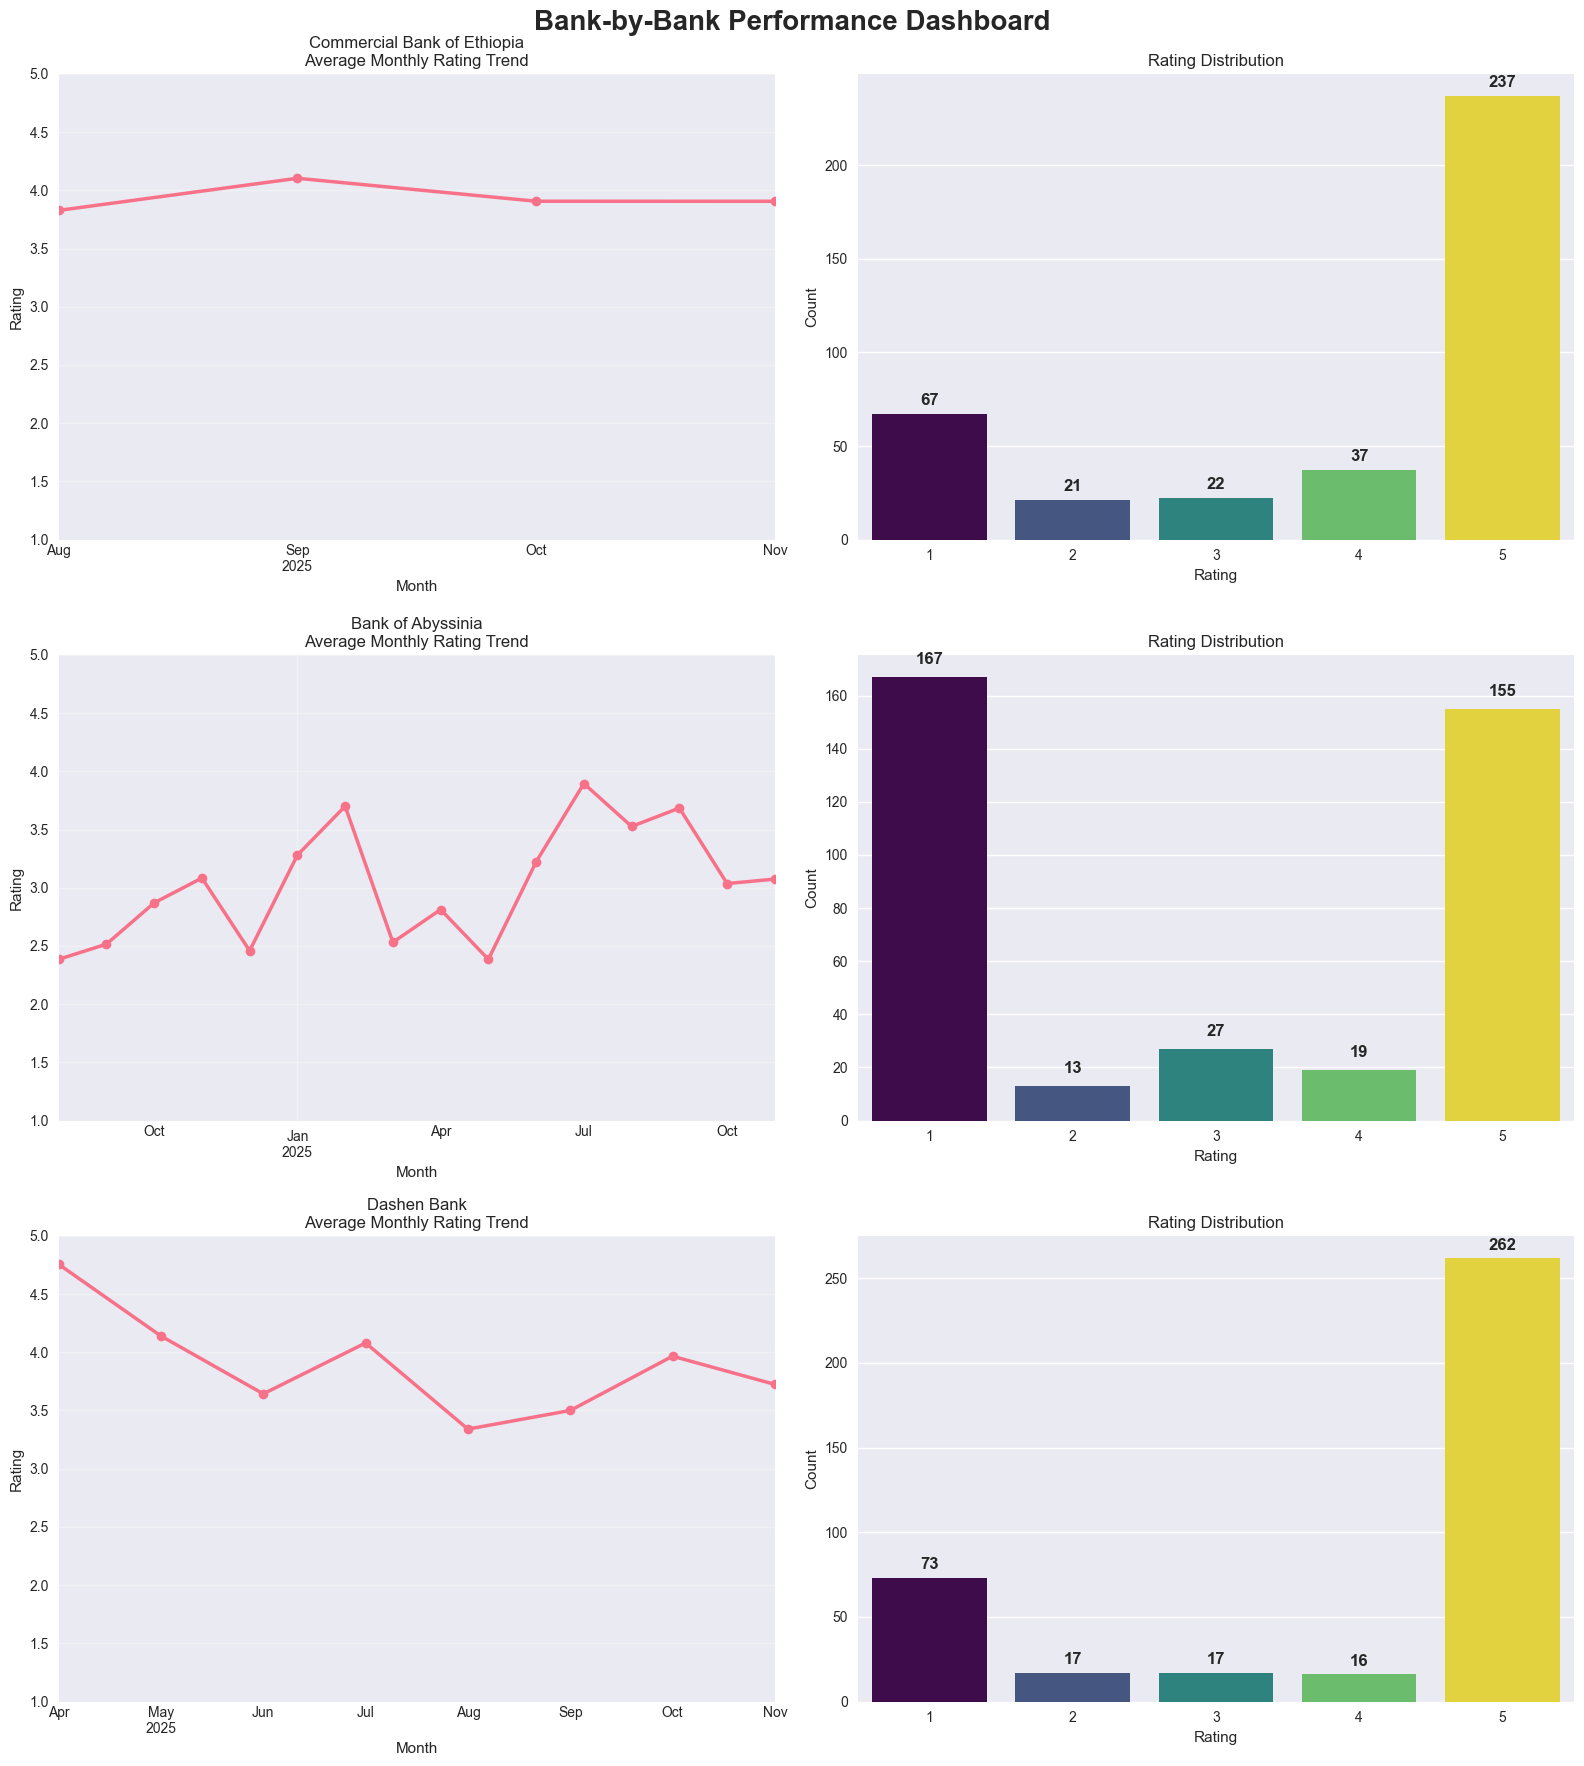

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Bank-by-Bank Performance Dashboard', fontsize=20, fontweight='bold')

for idx, bank in enumerate(['Commercial Bank of Ethiopia', 'Bank of Abyssinia', 'Dashen Bank']):
    bank_data = processed_df[processed_df['bank_name'] == bank]
    
    # Rating trend over time
    monthly = bank_data.groupby(bank_data['review_date'].dt.to_period('M'))['rating'].mean()
    monthly.plot(ax=axes[idx, 0], marker='o', linewidth=2.5)
    axes[idx, 0].set_title(f'{bank}\nAverage Monthly Rating Trend')
    axes[idx, 0].set_ylim(1, 5)
    axes[idx, 0].grid(True, alpha=0.3)
    axes[idx, 0].set_xlabel('Month'), axes[idx, 0].set_ylabel('Rating')
    
    # Rating distribution
    sns.countplot(data=bank_data, x='rating', hue='rating', ax=axes[idx, 1], palette='viridis', legend=False)
    axes[idx, 1].set_title(f'Rating Distribution')
    axes[idx, 1].set_xlabel('Rating'), axes[idx, 1].set_ylabel('Count')
    for p in axes[idx, 1].patches:
        axes[idx, 1].text(p.get_x() + p.get_width()/2, p.get_height() + 5, 
                          int(p.get_height()), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../plots/02_bank_performance_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()